In [60]:
import numpy as np
import pandas as pd

from pybats.shared import load_sales_example
from pybats.analysis import *
from pybats.point_forecast import *
from pybats.plot import *
from pybats.loss_functions import MAPE

import matplotlib.pyplot as plt
from numpy import genfromtxt

In [73]:
# Load spending data
data = pd.read_csv('data.csv')  

Y = data
X = [i for i in range(1,101)]  # pseudo time series
X = np.array(X)

k = 1                                               # Forecast 1 step ahead
forecast_start = 1                               # Start forecast at time step 15
forecast_end = 5

mod, samples = analysis(Y, X, family="poisson",
forecast_start=forecast_start,      # First time step to forecast on
forecast_end=forecast_end,          # Final time step to forecast on
k=k,                                # Forecast horizon. If k>1, default is to forecast 1:k steps ahead, marginally
ntrend = 2, deltrend=.99,
seasPeriods=[4], seasHarmComponents=[[1,2]], delseas=.99,
nsamps = 5000)

beginning forecasting


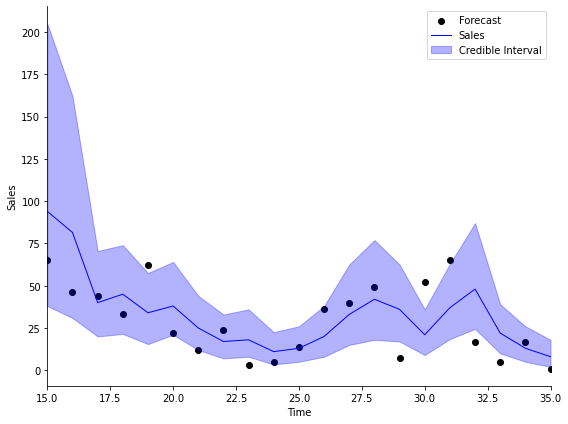

In [74]:
forecast = median(samples)

# Plot the 1-quarter ahead forecast
h = 1
start = data[0].index[0] + h
end = data[-1].index[0] + h + 1

fig, ax = plt.subplots(figsize=(12, 6))
plot_data_forecast(fig, ax, y = data[start:end].Inflation.values,
                   f = forecast[:,h-1],
                   samples = samples[:,:,h-1],
                   dates = pd.to_datetime(data[start:end].Date.values),
                   xlabel='Time', ylabel='Sale', title='1-Quarter Ahead Forecasts');
